# MACHINE LEARNING PROJECT

## 1. IMPORT LIBRARIES, TOOLS, AND DATASETS

### 1.1. Import Libraries and tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns
import numpy as np
#from pandas_profiling import ProfileReport
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


### 1.2. Load and view Training and Testing Dataset

In [2]:
#loading the UNSV train and test dataset into jupyter notebook
train = pd.read_csv('/Users/nayanichamalka/CQU/sem 5/Project/UNSW_NB15_training-set.csv')
test = pd.read_csv('/Users/nayanichamalka/CQU/sem 5/Project/UNSW_NB15_testing-set.csv')

In [3]:
#DISPLAY THE NUMBER OF ROWS AND COLUMNS ON THE DATASET AND FIRST 5 ROWS
print(train.shape)
train.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
#DISPLAY THE LAST 5 ROWS
train.tail()

## 2. PERFORM SIMPLE EXPLORATORY DATA ANALYSIS OF UNSW DATA FRAME

### 2.1. Understanding the UNSW Dataset

In [ ]:
#view the dataset general information
train.info()

In [26]:
#BASIC DESCRIPTIVE STATISTICS OF THE DATASET
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_le,service_le,state_le,attack_le
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600,109.348273,1.421695,3.374751,4.987757
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436,18.637282,2.108083,0.670372,1.431541
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,111.000000,0.000000,3.000000,4.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000,111.000000,0.000000,3.000000,5.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000,117.000000,2.000000,4.000000,6.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000,130.000000,12.000000,6.000000,9.000000


### 2.2. VISUALIZATIONS

#### 2.2.1. Frequency of Categories of output variable using Count plot

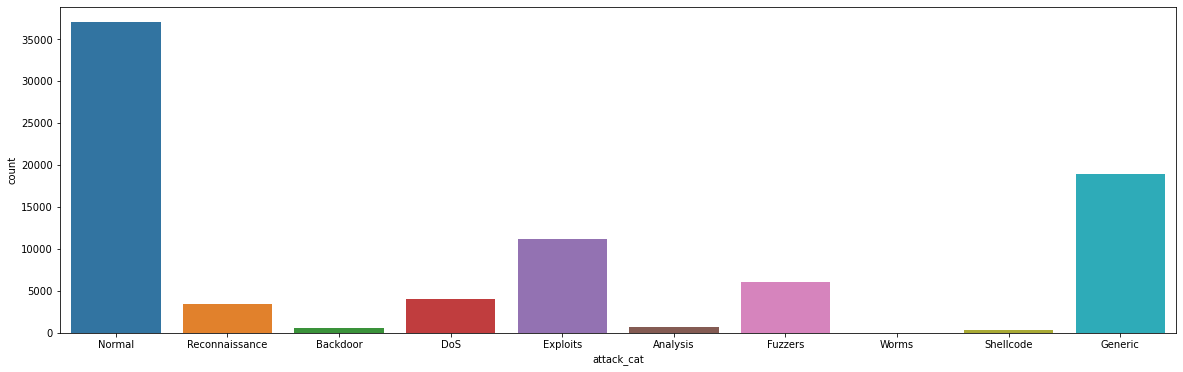

In [27]:
#Frequency of different categories of attacks
plt.figure(figsize=(20,6))
sns.countplot(x='attack_cat', data = train)
plt.show()

#### 2.2.2. Spreads of Output/Target Variable using Violin plot

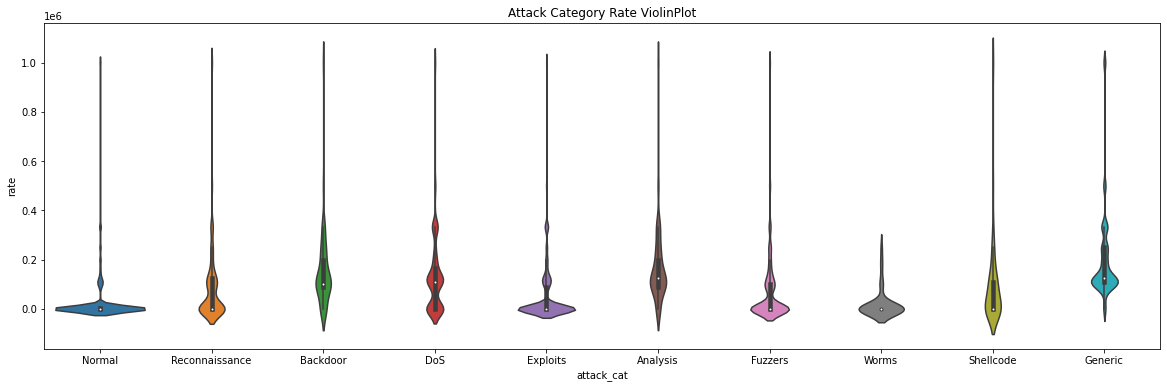

In [28]:
#Attack categories spread with respect to rate variable
plt.figure(figsize=(20,6))
sns.violinplot(x='attack_cat', y='rate', data= train).set_title('Attack Category Rate ViolinPlot')
plt.show()

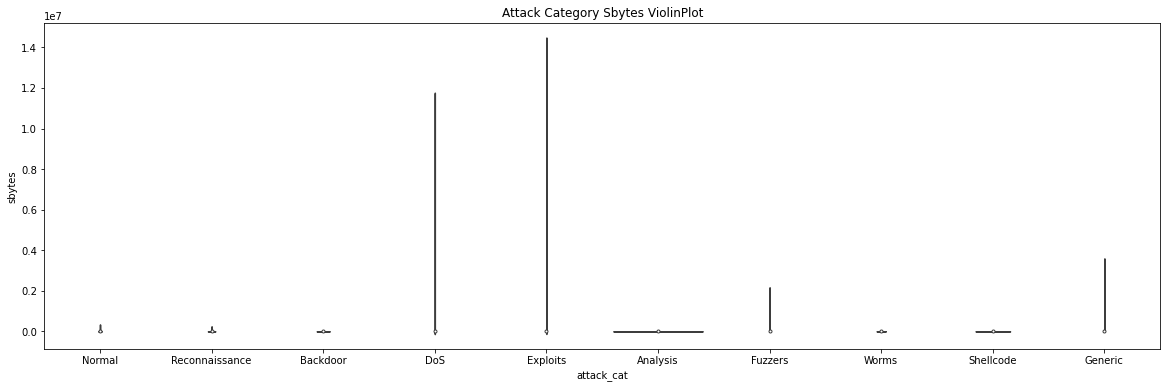

In [29]:
#Attack Sub categories spread with respect to sbytes variable
plt.figure(figsize=(20,6))
sns.violinplot(x='attack_cat', y='sbytes', data= train).set_title('Attack Category Sbytes ViolinPlot')
plt.show()

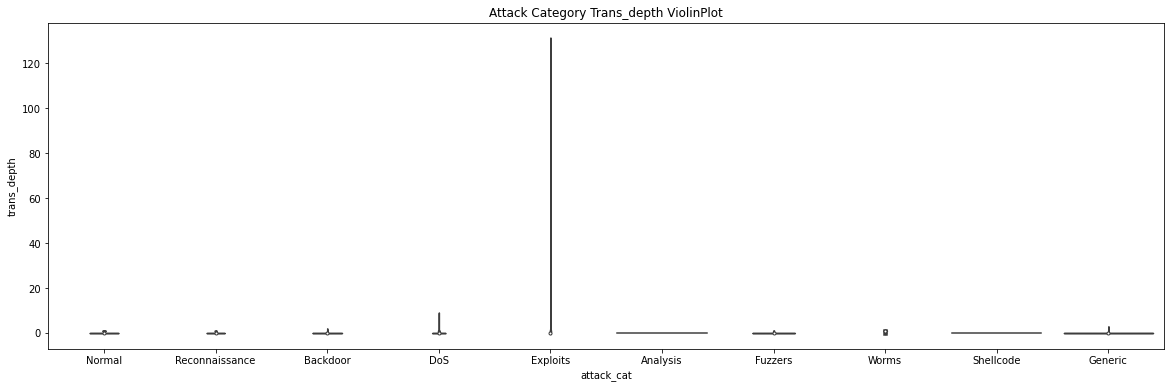

In [30]:
#Attack Sub categories spread with respect to trans_depth variable
plt.figure(figsize=(20,6))
sns.violinplot(x='attack_cat', y='trans_depth', data= train).set_title('Attack Category Trans_depth ViolinPlot')
plt.show()

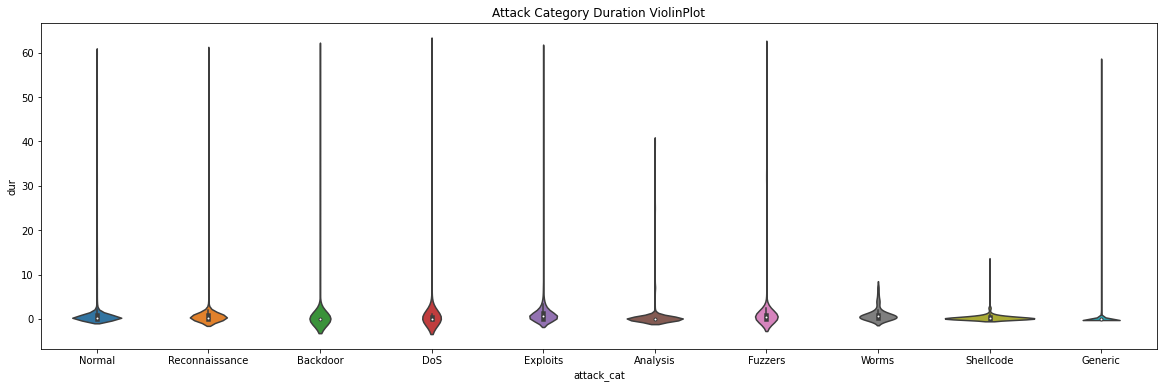

In [31]:
#Attack Sub categories spread with respect to duration variable
plt.figure(figsize=(20,6))
sns.violinplot(x='attack_cat', y='dur', data= train).set_title('Attack Category Duration ViolinPlot')
plt.show()

#### 2.2.3. Relationship of output variable (attack_cat) to other variables using relational plot

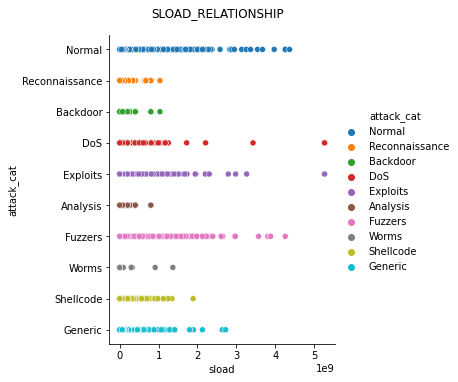

In [32]:
#Relationship to sload attribute
sns.relplot(x="sload", y= "attack_cat", hue = "attack_cat", data = train)
plt.suptitle('SLOAD_RELATIONSHIP', y=1.05)
plt.show()

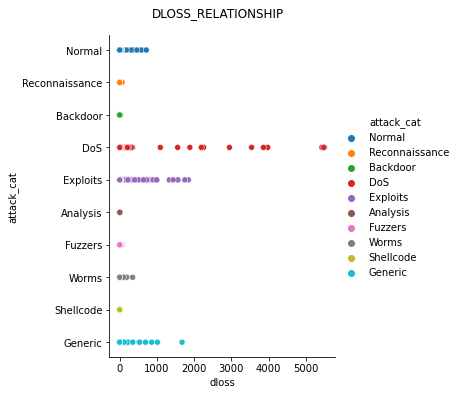

In [33]:
#Relationship to dloss attribute
sns.relplot(x="dloss", y= "attack_cat", hue = "attack_cat", data = train)
plt.suptitle('DLOSS_RELATIONSHIP', y=1.05)
plt.show()

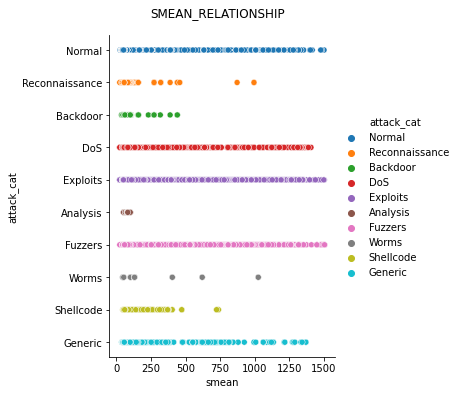

In [34]:
#Relationship to smean attribute
sns.relplot(x="smean", y= "attack_cat", hue = "attack_cat", data = train)
plt.suptitle('SMEAN_RELATIONSHIP', y=1.05)
plt.show()

In [35]:
#PERFORM SIMPLE EXPLORATORY DATA ANALYSIS USING PANDAS PROFILING
profile = ProfileReport(train, title = 'Profile Report for Training Dataset', html= { 'style' : {'full_width':True}})

NameError: name 'ProfileReport' is not defined

## 3. DATA PRE PROCESSING/CLEANING

### 3.1. View missing values and Datatypes

In [3]:
#CHECK FOR MISSING VALUES IN THE COLUMNS/FEATURES OF THE TRAIN DATASET
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [4]:
#SHOW THE DATATYPE OF EACH VARIABLE IN THE DATA FRAME
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [5]:
#DISPLAY ONLY CATEGORICAL DATA (OBJECT DATATYPES)
train.select_dtypes(include = ['object'])

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal
...,...,...,...,...
82327,udp,-,INT,Normal
82328,tcp,-,FIN,Normal
82329,arp,-,INT,Normal
82330,arp,-,INT,Normal


### 3.2. Feature Engineering with Label Encoding Technique

#### 3.2.1. Transform Categorical data to numerical data

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
#create new numerical columns to replace existing categorical ones on train dataframe
train['proto_le'] = le.fit_transform(train.proto)
train['service_le'] = le.fit_transform(train.service)
train['state_le'] = le.fit_transform(train.state)
train['attack_le'] = le.fit_transform(train.attack_cat)

#create new numerical columns to replace existing categorical ones on test dataframe
test['proto_le'] = le.fit_transform(test.proto)
test['service_le'] = le.fit_transform(test.service)
test['state_le'] = le.fit_transform(test.state)
test['attack_le'] = le.fit_transform(test.attack_cat)

In [7]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,proto_le,service_le,state_le,attack_le
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,0,1,2,0,Normal,0,117,0,4,6
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,0,1,2,0,Normal,0,117,0,4,6
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,0,1,3,0,Normal,0,117,0,4,6
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,0,2,3,0,Normal,0,117,0,4,6
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,0,2,3,0,Normal,0,117,0,4,6


#### 3.2.2. Display Categorical data and corresponding numerical data labels 

In [8]:
#proto column labels
train.proto.unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [9]:
#proto_le column labels
train.proto_le.unique()

array([117,   6, 111,  41,  77,  95,  32,  30,  44,  49, 106,   4,  13,
        23,  25,  76,  85, 127,  72,  19,  33,  83, 114, 115, 128,  64,
        65,  57,  88,  74,  67,  66,   0,  37,  20,  38, 113,  51,  96,
        52,  55,  39,  68,  34,  90,  70,  73,  99, 112,  53,   3,  54,
        12,  91,  50,  61,  92,  16, 126,  86,  10, 108, 125, 122, 116,
       120,  75,  22,  24, 110, 103,  63,  71,   7,  47,   2,  69,  26,
        82,  31,  40,  81,  87,  94,  11,   8,  42,   9, 109, 121,  46,
        15,  60, 124,  98,  97, 129,  43,  89, 118,  28,  59,  27,  79,
         5,   1,  45, 102,  14,  56,  78, 123,  62, 130,  21,  35, 107,
       105, 119, 100, 101,  58,  84,  29,  17,  18,  93,  48,  80, 104,
        36])

In [10]:
#service column labels
train.service.unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [11]:
#service_le column labels
train.service_le.unique()

array([ 0,  5,  3,  4,  9,  7,  2, 10, 12,  1,  6,  8, 11])

In [12]:
#state column labels
train.state.unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [13]:
#state_le column labels
train.state_le.unique()

array([4, 3, 5, 0, 2, 6, 1])

In [14]:
#attack_cat column labels
train.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [15]:
#attack_le column labels
train.attack_le.unique()

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

#### 3.2.3. Remove categorical data attributes from the train and test data frame

In [16]:
#Remove four categorical data columns from both dataframes

train = train.drop(['proto','service','state','attack_cat'], axis = 1)
test = test.drop(['proto','service','state','attack_cat'], axis = 1)

In [17]:
#REMOVE USELESS "id" COLUMN

train = train.drop(['id'], axis =1)
test = test.drop(['id'], axis =1)

In [18]:
#DISPLAY TRAIN DATAFRAME HEAD
train[:4]

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_le,service_le,state_le,attack_le
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,1,2,0,0,117,0,4,6
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,1,2,0,0,117,0,4,6
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0,0,1,3,0,0,117,0,4,6
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0,0,2,3,0,0,117,0,4,6


#### 3.2.4. Assigning input and Output variables

#### So we assign the input variables the value 'X' and the ouput variable (attack_le) the value 'y'

In [19]:
#Seperate the train dataframe into input and output data

X_train = train.drop('attack_le', axis=1)
y_train = train['attack_le']

In [20]:
#Seperate the test dataframe into input and output data

X_test = test.drop('attack_le', axis=1)
y_test = test['attack_le']

In [21]:
X_train.shape

(82332, 43)

In [22]:
X_test.shape

(175341, 43)

### 3.3. Feature Scaling Training Dataset with Normalization method

In [23]:
#Applying Standard scaling for optimized results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-0.21372745, -0.1244551 , -0.15181641, ...,  0.41056274,
        -0.6744059 ,  0.93269533],
       [-0.21372808, -0.1244551 , -0.15181641, ...,  0.41056274,
        -0.6744059 ,  0.93269533],
       [-0.21372872, -0.1244551 , -0.15181641, ...,  0.41056274,
        -0.6744059 ,  0.93269533],
       ...,
       [-0.21372978, -0.1319225 , -0.15181641, ..., -5.54527746,
        -0.6744059 ,  0.93269533],
       [-0.21372978, -0.1319225 , -0.15181641, ..., -5.54527746,
        -0.6744059 ,  0.93269533],
       [-0.21372787, -0.1244551 , -0.15181641, ...,  0.41056274,
        -0.6744059 ,  0.93269533]])

## 4. BUILD AND TEST MACHINE MODEL WITH SELECTED ALGORITHMS

### 4.1. Build model with Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators=200) #create random forest algorithm
rfc.fit(X_train, y_train) #feed training data to the algorithm
pred_rfc = rfc.predict(X_test) #predict the outcome of the algorithm

In [31]:
pred_rfc

array([6, 6, 6, ..., 5, 5, 5])

In [32]:
y_test

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_le, Length: 175341, dtype: int64

### 4.2. Evaluate Performance of Random Forest model

In [33]:
#evaluate performance of the algorithm
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.96      0.05      0.09      1746
           2       0.35      0.36      0.35     12264
           3       0.67      0.75      0.71     33393
           4       0.92      0.86      0.89     18184
           5       0.94      0.98      0.96     40000
           6       1.00      1.00      1.00     56000
           7       0.92      0.74      0.82     10491
           8       0.47      0.62      0.54      1133
           9       0.86      0.15      0.25       130

    accuracy                           0.85    175341
   macro avg       0.71      0.55      0.56    175341
weighted avg       0.85      0.85      0.84    175341



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.3. Build the model with K-Neigherest Neighbour Classifier

In [25]:
knc = KNeighborsClassifier(n_neighbors=5) 
knc.fit(X_train, y_train)
print(knc)
#make predictions
pred_knc = knc.predict(X_test)

KNeighborsClassifier()


### 4.4 Evaluate performance of the K-Neigherest Neighbour Classifier

In [30]:
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       0.05      0.02      0.02      2000
           1       0.04      0.00      0.01      1746
           2       0.31      0.47      0.37     12264
           3       0.65      0.64      0.64     33393
           4       0.77      0.69      0.73     18184
           5       0.98      0.98      0.98     40000
           6       0.99      0.99      0.99     56000
           7       0.57      0.57      0.57     10491
           8       0.41      0.20      0.27      1133
           9       0.50      0.02      0.04       130

    accuracy                           0.80    175341
   macro avg       0.53      0.46      0.46    175341
weighted avg       0.80      0.80      0.80    175341



### 4.5. Build the model with Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt)
# make predictions
pred_dt = dt.predict(X_test)

DecisionTreeClassifier()


In [ ]:
### 4.4 Evaluate performance of the Decision Tree Classifier

In [26]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.39      0.01      0.02      2000
           1       0.44      0.07      0.12      1746
           2       0.33      0.59      0.42     12264
           3       0.70      0.53      0.60     33393
           4       0.93      0.76      0.84     18184
           5       0.84      0.99      0.91     40000
           6       1.00      1.00      1.00     56000
           7       0.87      0.74      0.80     10491
           8       0.41      0.35      0.38      1133
           9       0.53      0.45      0.48       130

    accuracy                           0.81    175341
   macro avg       0.64      0.55      0.56    175341
weighted avg       0.83      0.81      0.81    175341



### 5. Sending Email Notifications

In [6]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

fromaddr = "group.14.aicyber@gmail.com"
toaddr = "nayani930325@gmail.com"

msg = MIMEMultipart()

msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = "SUBJECT OF THE EMAIL"

body = """
<html><body><p>Hello, Friend.</p>
<p>Here is your data:</p>
{table}
<p>Regards,</p>
<p>Me</p>
</body></html>
"""

msg.attach(MIMEText(body, 'plain'))

filename = "UNSW_NB15_training-set.csv"
attachment = open("/Users/nayanichamalka/Downloads/12131057-skills-development-plan.xlsx", "rb")

part = MIMEBase('application', 'octet-stream')
part.set_payload((attachment).read())
encoders.encode_base64(part)
part.add_header('Content-Disposition', "attachment; filename= %s" % filename)

msg.attach(part)

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(fromaddr,'Group14@')
text = msg.as_string()
server.sendmail(fromaddr, toaddr, text)
server.quit()

(221, b'2.0.0 closing connection l19sm2267420pjq.10 - gsmtp')

In [11]:
import smtplib
import imghdr
from email.message import EmailMessage

EMAIL_ADDRESS = 'group.14.aicyber@gmail.com'
EMAIL_PASSWORD = 'Group14@'

contacts = ['thilinamx@gmail.com', 'nayani930325@gmail.com']

msg = EmailMessage()
msg['Subject'] = 'Check out Bronx as a puppy!'
msg['From'] = EMAIL_ADDRESS
msg['To'] = contacts

msg.set_content('This is a plain text email 2')

msg.add_alternative("""\
<!DOCTYPE html>
<html>
    <table>
  <tr>
    <th>Company</th>
    <th>Contact</th>
    <th>Country</th>
  </tr>
  <tr>
    <td>Alfreds Futterkiste</td>
    <td>Maria Anders</td>
    <td>Germany</td>
  </tr>
  <tr>
    <td>Centro comercial Moctezuma</td>
    <td>Francisco Chang</td>
    <td>Mexico</td>
  </tr>
</table>
</html>
""", subtype='html')

with open("/Users/nayanichamalka/Downloads/12131057-skills-development-plan.xlsx", "rb") as f:
    file_data = f.read()
    file_name = f.name
    
msg.add_attachment(file_data,maintype='application',subtype='octet-stream',filename=file_name)




with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
    smtp.send_message(msg)